### Import Necessary Module and Set Path 

In [47]:
import sqlite3 as lite
import os
import sys
import numpy as np
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()
from IPython.display import Image
import matplotlib.pyplot as plt

In [48]:
import analysis as an

In [50]:
# get sqlite cursor and simulation time data
cur = an.get_cursor('lwr_only.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(cur)

In [51]:
# get number of reactors and capacity timeseries
an.plot_power(cur)

Sink_Source_Inst has no values
Sink_Source_Inst has no values


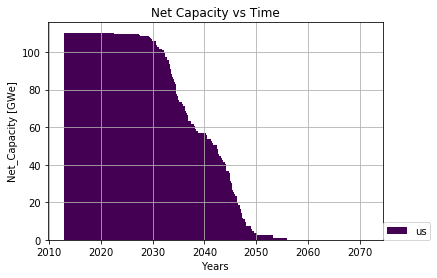

In [52]:
Image('power_plot.png')

110.289
147.0
47.0


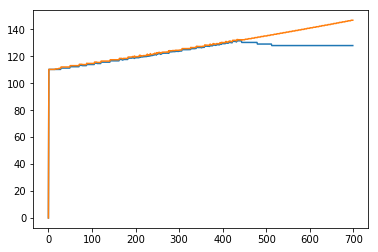

In [62]:
# get lwr_only, find deployment scheme for lwr and sfr
cur = an.get_cursor('lwr_only.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(cur)
power_dict = an.get_power_dict(cur)
print(power_dict['us_government'][1])
dep_array, dep_power = an.get_new_deployment(power_dict, ['us_government'],
                                             '110*(1.005)**(t/12)', 1, 960)

print(sum(dep_array))
lwr_dep_array = np.zeros(len(dep_array))
lwr_power_array =np.zeros(len(dep_power))
for indx, val in enumerate(dep_array):
    if (2013*12 + 5) + indx > 2050*12:
        break
    else:
        lwr_dep_array[indx] = val

def get_power_of_dep_array(dep_array, lifetime, power):
    power_array = np.zeros(len(dep_array))
    for indx, val in enumerate(dep_array):
        if val != 0:
            highend = min(indx+lifetime, len(dep_array))
            for i in range(indx, highend):
                power_array[i] += power * val
    return power_array

lwr_power = get_power_of_dep_array(lwr_dep_array, 960, 1)
plt.plot(np.array(power_dict['us_government']) + lwr_power )

new_power = {'power': power_dict['us_government'] + lwr_power}
sfr_dep, sfr_power = an.get_new_deployment(new_power, ['power'], '110*(1.005)**(t/12)',
                                           0.4, 960)



In [63]:
# write these deploy schemes to file
an.write_deployinst(lwr_dep_array, 'lwr', 'lwr_dep.xml', 960)
an.write_deployinst(sfr_dep, 'sfr', 'sfr_dep.xml', 960)


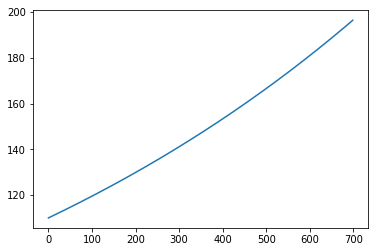

In [36]:
import parser
eq = parser.expr('110*(1.01)**(t/12)').compile()
demand_timeseries = np.zeros(700)
for indx, value in enumerate(demand_timeseries):
    t = indx
    demand_timeseries[indx] = eval(eq)
plt.plot(demand_timeseries)

In [24]:
an.write_deployinst(dep_array, 'sfr', 'deployinst2', 960)

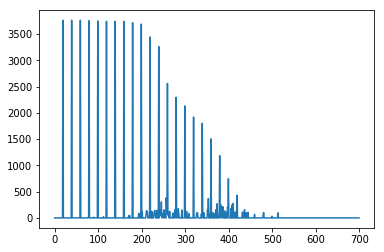

In [23]:
uox = an.get_agent_ids(cur, 'storage')
influx = an.facility_commodity_flux(cur, uox,
                                         ['uox_waste'],
                                         False, False)
plt.plot(influx['uox_waste'])


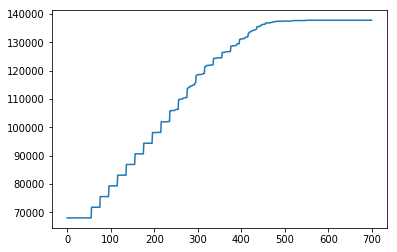

In [24]:

uox_rep = an.get_prototype_id(cur, 'reprocessing')
influx = an.facility_commodity_flux(cur, uox_rep,
                                         ['cooled_uox', 'pre_2013_unf'],
                                         False, True)
total = [x+y for x,y in zip(influx['cooled_uox'], influx['pre_2013_unf'])]
plt.plot(total)

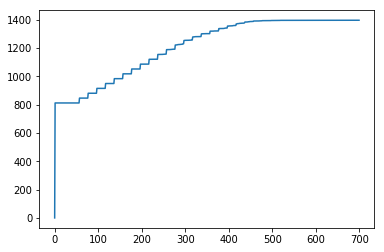

In [6]:
uox_rep = an.get_prototype_id(cur, 'reprocessing')
outflux = an.facility_commodity_flux(cur, uox_rep,
                                         ['lwr_pu'],
                                         True, True)
plt.plot(outflux['lwr_pu'])


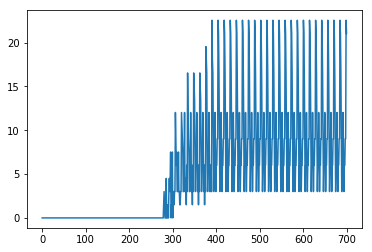

In [26]:
uox_rep = an.get_prototype_id(cur, 'sfr_reprocessing')
outflux = an.facility_commodity_flux(cur, uox_rep,
                                         ['sfr_pu'],
                                         True, False)
plt.plot(outflux['sfr_pu'])


69716.602


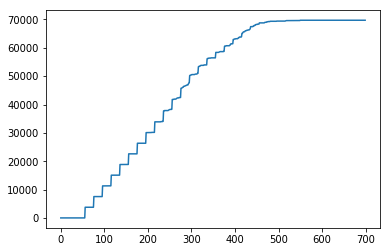

In [27]:
uox_unf = an.get_agent_ids(cur, 'storage')
outflux = an.facility_commodity_flux(cur, uox_unf, ['cooled_uox'], True, True)
plt.plot(outflux['cooled_uox'])
print(outflux['cooled_uox'][-1])

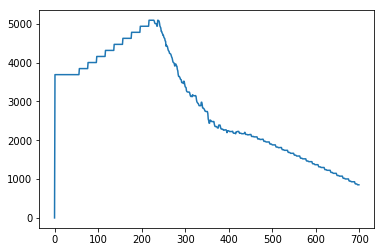

In [31]:
lwr_mixer = an.get_prototype_id(cur, 'sfr_mixer_lwr')
outflux = an.facility_commodity_flux(cur, lwr_mixer,
                                     ['sfr_fuel_legacy'],
                                     True, True)
outflux = np.array(outflux['sfr_fuel_legacy'])
influx = an.facility_commodity_flux(cur, lwr_mixer, ['lwr_pu'], False, True)
influx = np.array(influx['lwr_pu']) / 0.22

plt.plot(influx - outflux)

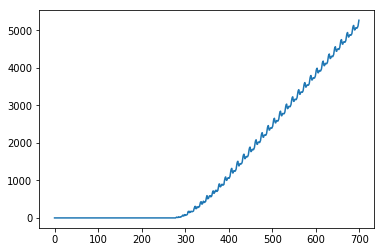

In [7]:
sfr_mixer = an.get_prototype_id(cur, 'sfr_mixer_sfr')
outflux = an.facility_commodity_flux(cur, sfr_mixer,
                                     ['sfr_fuel_new'],
                                     True, True)
outflux = np.array(outflux['sfr_fuel_new'])
influx = an.facility_commodity_flux(cur, sfr_mixer, ['sfr_pu'], False, True)
influx = np.array(influx['sfr_pu']) / 0.22
plt.plot(influx - outflux)